# House Price Prediction

This project aims to predict house prices using machine learning models. It involves data preprocessing, model training, evaluation, and prediction on test data. The project utilizes several Python libraries, including numpy, pandas, matplotlib, and seaborn.

## Dataset Download

The dataset can be downloaded from the following link: [House Prices Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

## Importing Necessary Libraries

In [7]:
# Libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and data transformation tools
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Model selection and performance evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Machine learning models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

## Loading training and test datasets

In [8]:
train_data = pd.read_csv("./house-prices-dataset/train.csv")
test_data = pd.read_csv("./house-prices-dataset/test.csv")

In [9]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
# Counting the number of duplicate rows in the DataFrame
train_data.duplicated().sum()

0

## Dividing the dataset into features and target variable

In [12]:
features = train_data.drop(columns=['SalePrice'])
target = train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

In [13]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal


In [14]:
X_train.shape

(1168, 80)

## Data Preprocessing

In [15]:
X_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1168.000000,1168.000000,951.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,730.904966,56.849315,70.343849,10689.642123,6.121575,5.584760,1970.965753,1984.897260,103.771945,446.023973,...,476.273973,95.946918,49.578767,21.839041,3.812500,15.407534,2.955479,51.267123,6.356164,2007.818493
std,425.369088,42.531862,24.897021,10759.366198,1.367619,1.116062,30.675495,20.733955,173.032238,459.070977,...,211.095373,129.685939,69.433580,62.083227,31.519664,55.881148,41.648504,553.039684,2.670707,1.322639
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,360.750000,20.000000,59.000000,7587.250000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,732.500000,50.000000,70.000000,9600.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,384.500000,...,482.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1101.750000,70.000000,80.000000,11700.000000,7.000000,6.000000,2001.000000,2004.000000,166.000000,721.000000,...,576.000000,168.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [16]:
# Checking for missing values in the training features dataset
X_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      217
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

In [17]:
# Calculating and printing the percentage of missing values in the training features dataset
missing_values_train = X_train.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0]
missing_percentage_train = (missing_values_train / len(X_train)) * 100
print(missing_percentage_train)

LotFrontage     18.578767
Alley           93.664384
MasVnrType      58.476027
MasVnrArea       0.513699
BsmtQual         2.397260
BsmtCond         2.397260
BsmtExposure     2.397260
BsmtFinType1     2.397260
BsmtFinType2     2.397260
Electrical       0.085616
FireplaceQu     46.832192
GarageType       5.479452
GarageYrBlt      5.479452
GarageFinish     5.479452
GarageQual       5.479452
GarageCond       5.479452
PoolQC          99.486301
Fence           80.051370
MiscFeature     96.061644
dtype: float64


In [18]:
# Identifying columns with missing values exceeding 30% and dropping them from the training dataset
columns_to_drop_train = missing_percentage_train[missing_percentage_train > 30].index
X_train.drop(columns=columns_to_drop_train, inplace=True)

print(X_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
254    255          20       RL         70.0     8400   Pave      Reg   
1066  1067          60       RL         59.0     7837   Pave      IR1   
638    639          30       RL         67.0     8777   Pave      Reg   
799    800          50       RL         60.0     7200   Pave      Reg   
380    381          50       RL         50.0     5000   Pave      Reg   
...    ...         ...      ...          ...      ...    ...      ...   
1095  1096          20       RL         78.0     9317   Pave      IR1   
1130  1131          50       RL         65.0     7804   Pave      Reg   
1294  1295          20       RL         60.0     8172   Pave      Reg   
860    861          50       RL         55.0     7642   Pave      Reg   
1126  1127         120       RL         53.0     3684   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
254          Lvl    AllPub    Inside  ... 

In [19]:
# Identifying columns with missing values less than 30%
columns_to_fill_train = missing_percentage_train[missing_percentage_train < 30].index

columns_to_fill_train

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [20]:
# Filling missing values in columns with numerical or categorical data in the training dataset
for column in columns_to_fill_train:
    if X_train[column].dtype == "float64" or X_train[column].dtype == "int64":
        X_train[column].fillna(X_train[column].mean(), inplace=True)
    else:
        X_train[column].fillna(X_train[column].mode()[0], inplace=True)

X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,IR1,Lvl,AllPub,Inside,...,40,0,0,0,0,0,5,2009,WD,Normal
638,639,30,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,...,0,164,0,0,0,0,5,2008,WD,Normal
799,800,50,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Corner,...,0,264,0,0,0,0,6,2007,WD,Normal
380,381,50,RL,50.0,5000,Pave,Reg,Lvl,AllPub,Inside,...,0,242,0,0,0,0,5,2010,WD,Normal


In [21]:
# Counting the number of unique values in the 'Id' column of the training dataset
unique_ids_train = X_train['Id'].nunique()

# Removing the 'Id' column from the training dataset
X_train.drop(columns=['Id'], inplace=True)

In [22]:
# Extracting numerical and categorical column names from the training dataset
num_columns_train = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns_train = X_train.select_dtypes(exclude=np.number).columns.tolist()

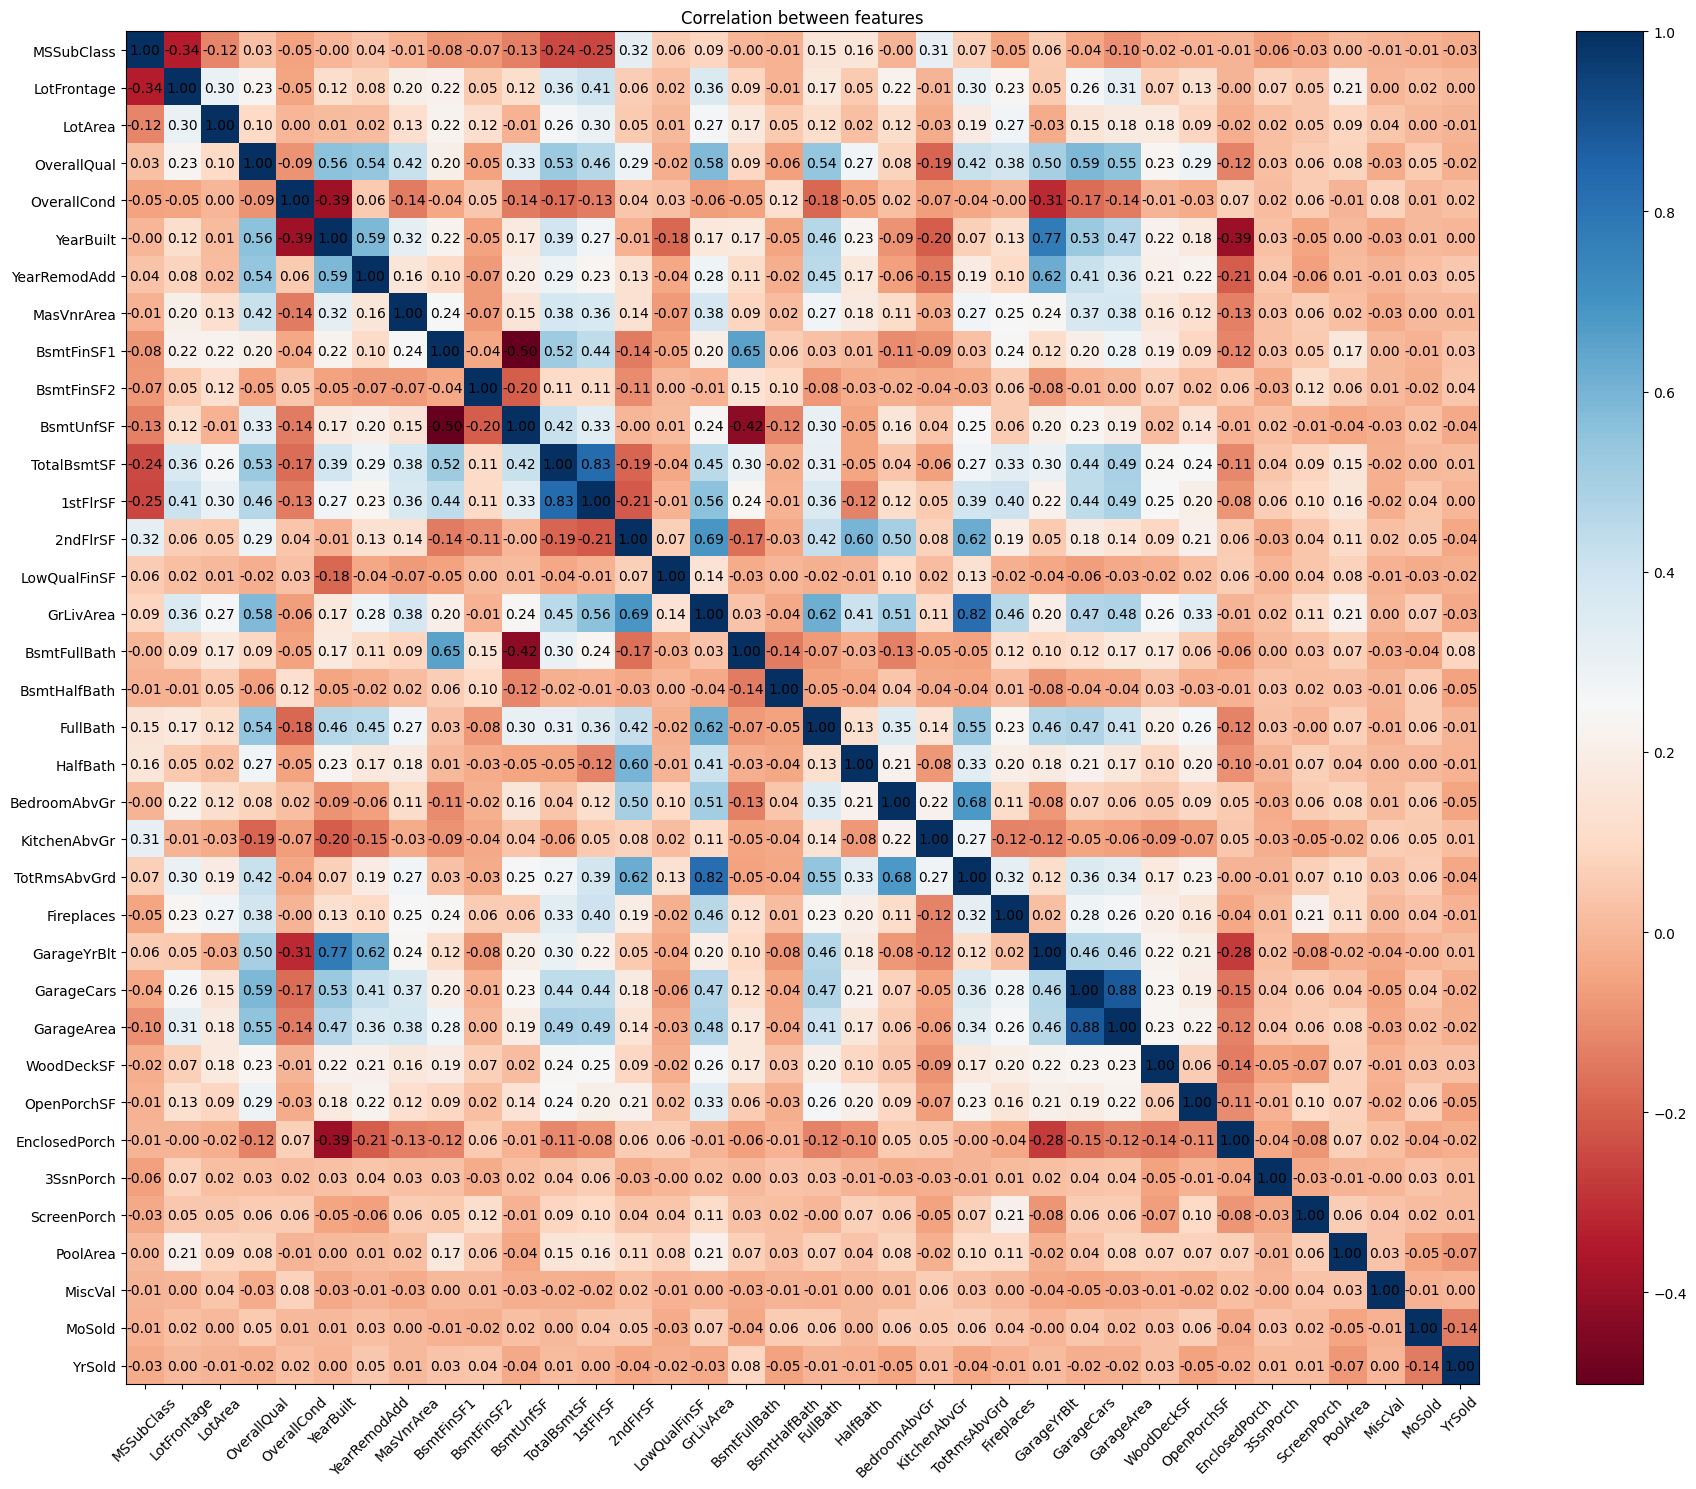

In [23]:
# Displaying correlation matrix
corr_matrix_train = X_train[num_columns_train].corr()

plt.figure(figsize=(20, 15))

plt.imshow(corr_matrix_train, cmap='RdBu', interpolation='nearest')

plt.colorbar()

plt.xticks(np.arange(len(corr_matrix_train.columns)), corr_matrix_train.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix_train.columns)), corr_matrix_train.columns)

for i in range(len(corr_matrix_train.columns)):
    for j in range(len(corr_matrix_train.columns)):
        plt.text(j, i, f"{corr_matrix_train.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.title('Correlation between features')
plt.tight_layout()
plt.show()

In [24]:
# Removing specific columns from num_columns_train list
columns_to_remove = ['GarageArea', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
                     'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'GarageYrBlt']

for column in columns_to_remove:
    if column in num_columns_train:
        num_columns_train.remove(column)

## Model Evaluation with Preprocessing Pipeline

In [25]:
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), MinMaxScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

preprocessor = ColumnTransformer([
    ('num_transformer', num_pipeline, num_columns_train),
    ('cat_transformer', cat_pipeline, cat_columns_train)
])

# Defining a function for model prediction
def evaluate_model(model):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return f"{type(model).__name__}'s performance: RMSE = {rmse:.2f}, MAE = {mae:.2f}, R2 = {r2:.2f}"

## Evaluating Different Models

In [26]:
print(evaluate_model(LinearRegression()))
print(evaluate_model(RidgeCV()))
print(evaluate_model(ElasticNetCV()))
print(evaluate_model(LassoCV()))
print(evaluate_model(DecisionTreeRegressor(random_state=42)))
print(evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)))
print(evaluate_model(XGBRegressor(random_state=42)))
print(evaluate_model(GradientBoostingRegressor(random_state=42)))

# Defining and evaluating the best model
best_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42)
print(evaluate_model(best_model))

LinearRegression's performance: RMSE = 31462.80, MAE = 20216.47, R2 = 0.87
RidgeCV's performance: RMSE = 34349.09, MAE = 21452.92, R2 = 0.85
ElasticNetCV's performance: RMSE = 84146.32, MAE = 59133.05, R2 = 0.08
LassoCV's performance: RMSE = 32394.95, MAE = 19965.26, R2 = 0.86
DecisionTreeRegressor's performance: RMSE = 40718.81, MAE = 26907.36, R2 = 0.78
RandomForestRegressor's performance: RMSE = 30157.78, MAE = 18979.59, R2 = 0.88
XGBRegressor's performance: RMSE = 30880.62, MAE = 19167.48, R2 = 0.88
GradientBoostingRegressor's performance: RMSE = 29847.52, MAE = 18518.95, R2 = 0.88
GradientBoostingRegressor's performance: RMSE = 26288.18, MAE = 16576.55, R2 = 0.91


## Making Predictions on Test Data

In [27]:
id = test_data['Id'].copy()
test_data = test_data.drop('Id', axis=1)
test_preprocessed = preprocessor.transform(test_data)
predictions = best_model.predict(test_preprocessed)
predicted_df = pd.DataFrame({
    'Id': id,
    'SalePrice': predictions
})

# Saving predictions to a CSV file
predicted_df.to_csv('predicted_prices.csv', index=False)

In [28]:
predicted_df

,Id,SalePrice
0,1461,125748.951080
1,1462,153241.889063
2,1463,181958.301032
3,1464,190963.874761
4,1465,197136.405104
...,...,...
1454,2915,83354.141728
1455,2916,70072.199988
1456,2917,172423.309285
1457,2918,126694.684500
